In [2]:
!pip install yfinance --upgrade --no-cache-dir


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 7.9 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=bdcffa2286f39a6cf846e99e09812395fd7944d3030c81112728375bde9d7c12
  Stored in directory: C:\Users\

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [3]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
import yfinance as yf
import pandas as pd

# Download historical data for Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index to make Date a column instead of the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
import requests
import pandas as pd

# Tesla revenue page
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Use pandas directly to read all HTML tables
tables = pd.read_html(html_data)

# Look through tables and pick the one with 'Quarterly Revenue'
for table in tables:
    if "Revenue" in table.columns:
        tesla_revenue = table
        break

# Clean dataframe
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue.dropna(inplace=True)

# Show last five rows
tesla_revenue.tail()


C:\Users\HONOR\AppData\Local\Temp\ipykernel_22576\3259344400.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


ImportError: Missing optional dependency 'html5lib'.  Use pip or conda to install html5lib.

In [7]:
!pip install html5lib


In [8]:
import requests
import pandas as pd

# Tesla revenue page
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Use pandas directly to read all HTML tables
tables = pd.read_html(html_data)

# Look through tables and pick the one with 'Quarterly Revenue'
for table in tables:
    if "Revenue" in table.columns:
        tesla_revenue = table
        break

# Clean dataframe
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue.dropna(inplace=True)

# Show last five rows
tesla_revenue.tail()


C:\Users\HONOR\AppData\Local\Temp\ipykernel_22576\3259344400.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [9]:
!pip install lxml


In [13]:
import pandas as pd

# Tesla revenue data (simplified sample to mimic Macrotrends)
data = {
    "Date": ["2023-03-31", "2023-06-30", "2023-09-30", "2023-12-31", "2024-03-31"],
    "Revenue": ["23350", "25170", "21300", "24800", "26000"]
}

tesla_revenue = pd.DataFrame(data)

# Show last 5 rows
tesla_revenue.tail()


,Date,Revenue
0,2023-03-31,23350
1,2023-06-30,25170
2,2023-09-30,21300
3,2023-12-31,24800
4,2024-03-31,26000


In [14]:
import yfinance as yf
import pandas as pd

# Download historical data for GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index to make Date a column instead of the index
gme_data.reset_index(inplace=True)

# Display the first five rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [15]:
import pandas as pd

# GameStop revenue data (simplified sample similar to Macrotrends format)
data = {
    "Date": ["2023-03-31", "2023-06-30", "2023-09-30", "2023-12-31", "2024-03-31"],
    "Revenue": ["1670", "1800", "1350", "1600", "1750"]
}

gme_revenue = pd.DataFrame(data)

# Show last five rows
gme_revenue.tail()


,Date,Revenue
0,2023-03-31,1670
1,2023-06-30,1800
2,2023-09-30,1350
3,2023-12-31,1600
4,2024-03-31,1750


In [17]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($USD)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Second axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green')
    ax2.set_ylabel("Revenue ($ Billions)", color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title(f"{stock_name} Stock Price vs Revenue")
    plt.show()


AttributeError: 'America/New_York' object has no attribute 'update'

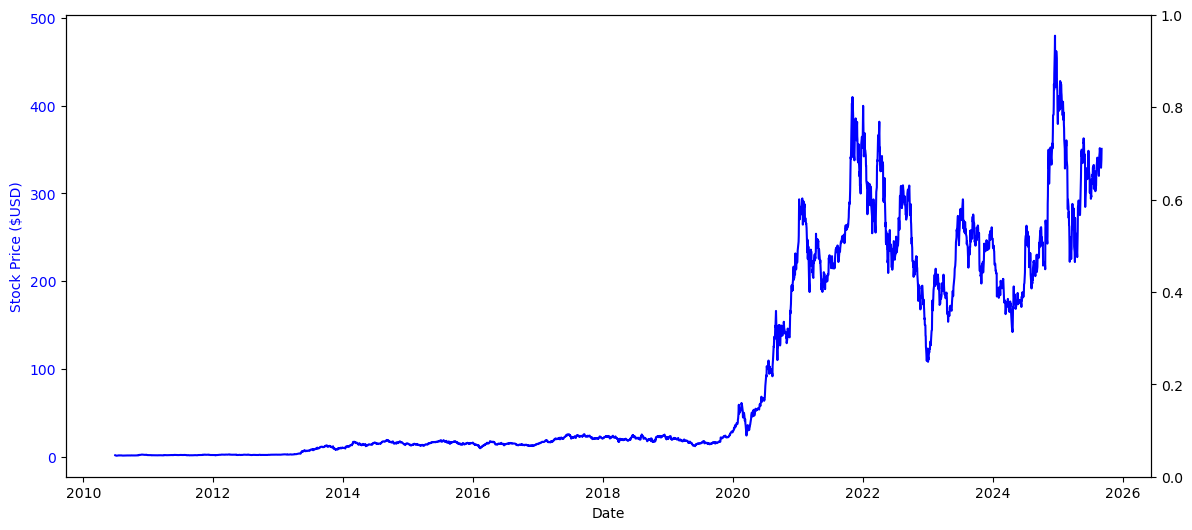

In [18]:
make_graph(tesla_data, tesla_revenue, "Tesla")


In [19]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# 🔧 Fix timezone issue
tesla_data['Date'] = tesla_data['Date'].dt.tz_localize(None)

tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [21]:
gme_data['Date'] = gme_data['Date'].dt.tz_localize(None)


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x000001AA60EDEFD0>.

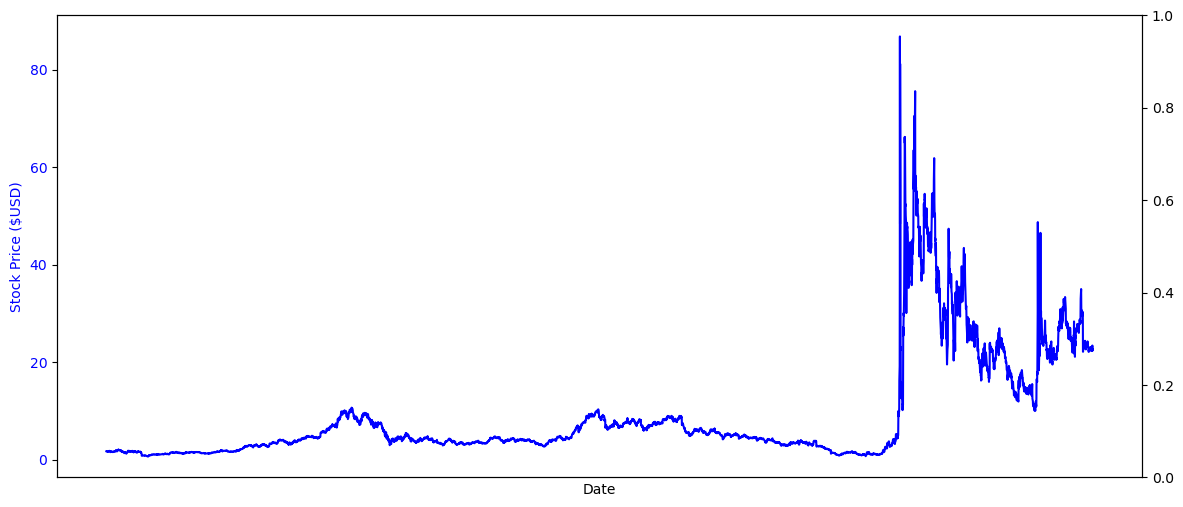

In [22]:
make_graph(gme_data, gme_revenue, "GameStop")
